<center><img src='https://drive.google.com/uc?export=view&id=12CrUdXDAiltLBT26sG7HZ_HciIhvGyT8'></center>


# Introduction to neural networks

**Author: Marcin Sydow and Jacek Sroka**

In this notebook, we do supervised learning with basic artificial neural networks (NN).

## Plan:

* *Single neuron (perceptron) as a classifier on the MNIST dataset:* We start with an example application of a single neuron (perceptron) as a classifier on a famous MNIST dataset containing 10000 hand-written digits to be classified to classes "0", ..., "9".
* *Training neural network with gradient method:* Training a neural network consists in minimizing the error (loss) as the function of neurons' parameters (weights and biases) with a "gradient method". The gradient method iteratively moves the parameters in the parameter space in the direction opposite to the gradient of the loss function in order to approximately find the local minimum.
* *Gradient computation with Tensorflow:* We demonstrate the ability of the `tensorflow` library to compute the gradient of an arbitrary function with regard to any of its arguments on a simple example function. Tensorflow uses this method under the hood for training neural networks.
* Using "multi-layer perceptron" (MLP) as a classifier: Next, we demonstrate how larger MLP can be built and trained as a classifier.
* Monitoring the training of MLP: We visually analyze how loss function and classification metrics change during training iterations (each such iteration over the whole training set is called "epoch") plotting a graph.
* Selecting the optimal number of epochs: This visual method can be used to decide what is the optimal number of epochs in training (too many epochs may result in overfitting of the neural network). This can be viewed as a form of hyperparameter (number of epochs) tuning.
* Example of more sophisticated NN architecture convolutional neural network (CNN) as image classifier: Finally we demonstrate how another popular architecture CNN that is specially designed to work with grid patterns (in particular: images), can be used to classify images and compare its complexity (number of parameters) and performance with standard MLP.

In this notebook we use one of the most popular Python libraries for neural networks: "keras" https://keras.io/about/, which is built on the top of "tensorflow" library, however, other popular libraries also exist, e.g. "pytorch".

## Importing Tensorflow and Keras
Note: Tensorflow can produce some messages concerning the runtime environment (GPU, CUDA, etc.) that in most cases can be ignored. In Colab we can also connect to environments with GPUs and TPUs (see [this](https://colab.research.google.com/notebooks/gpu.ipynb) and [this](https://colab.research.google.com/notebooks/tpu.ipynb)).



In [ ]:
import tensorflow as tf
from tensorflow import keras

## Example of 1-layer MLP as a classifier

### Exercise 1
Import `mnist` module from `keras.dataset` and split data into 4 subsets:
"train_images", "train_labels", "test_images", "test_labels"
by using the `mnist.load_data` function (see: https://keras.io/api/datasets/).

In [ ]:
# Put your code here


Tensorflow and keras work on tensors that keep the data. Tensor is a multi-dimensional generalisation of matrics. It is good to have a look at the shapes of the data tensors and types they store (make sure you know which types are default when you use numpy, tensorflow, pytorch).

### Exercise 2
Print shapes (`shape` field of each tensor) of all the 4 data tensors (train/test x images/labels). Print the shape of a single observation and its type (`dtype`). If it is numeric print min and max value stored in a single data tensor (observation).

Figure out how the MNIST images are represented in the data.

In [ ]:
# Put your code here


Tensor shapes: 
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)

Shape and type of a single image: 
(28, 28) uint8

The range of values of a single image: 
0 255

Type and values of the labels tensor: 
uint8 [5 0 4 ... 5 6 8]



### Interpretation of the data
It turns out that each observation tensor in MNIST represents a single 28x28 monochromatic image with 8-bit unsigned int values representing the pixel intensities (ranging from 0 to 255).


### Visualising a single MNIST image

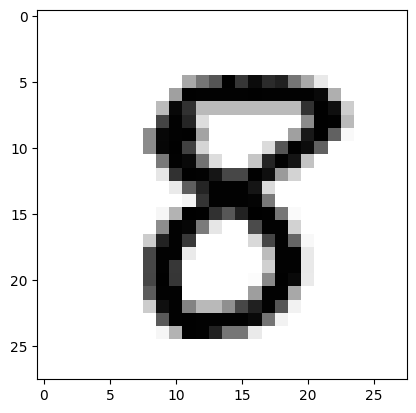

The label of the example observation: 8


In [ ]:
# visualise example image graphically
import matplotlib.pyplot as plt
plt.imshow(x, cmap = plt.cm.binary)
plt.show()
print(f"The label of the example observation: {train_labels[example_index]}")

## Examining label distribution
One of basic elements of exploratory data analysis is to examine the distribution of the class labels in the dataset.

### Exercise 3
Make a histogram (for example: you can use pandas, matplotlib.pyplot and hist function) showing the distribution of the labels ("0", ..., "9") in the train and test sets.

The fact whether the label distribution is balanced (close to uniform) is important for subsequent steps. In general it is easier when labels are uniformly balanced. In particular, one can use simple evaluation metrics like "accuracy" in such case.

### Question 4
Why acuracy is not recommended as an evaluation metric for classification when classes are unbalanced?

What other metrics are recommended in such case?

<Axes: ylabel='Frequency'>

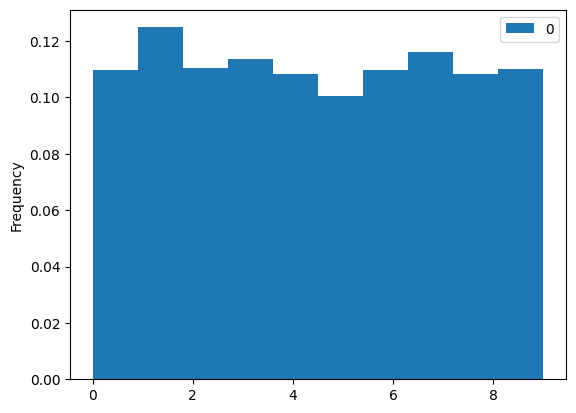

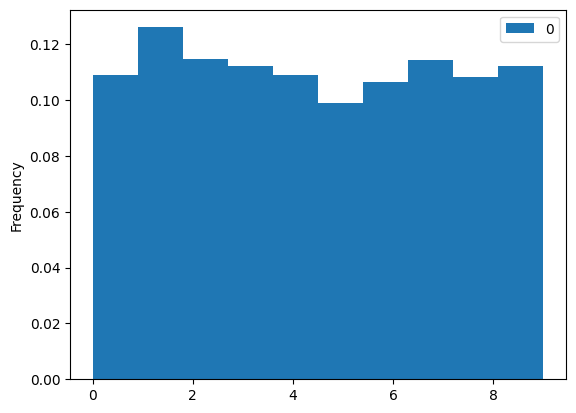

In [ ]:
# Put your code here


## Data preprocessing

### Reshaping data
A standard feed-forward neural network architecture like MLP typically accepts "flat" input vectors, i.e. 1-dimensional tensors, while each observation in our MNIST dataset is a 2-dimensional tensor.

Thus, the 2D images have to be reshaped to 1D "flat" vectors.

### Exercise 5
Flatten the data (train and test). You can use the `reshape` method.

Print the shapes of reshaped data tensors.

In [ ]:
# Put your code here


(60000, 784) (10000, 784)


### Scaling data
Typically, the inputs to NN are scaled to be within the [0,1] interval.

### Exercise 6
Rescale the data (divide by the max value: 255).

In [ ]:
# Put your code here


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Building a simple MLP

### Example
Now, we demonstrate how to build and train a simple NN classifier in keras.

It consists of the following steps:
1. create the network (`keras.Sequential`)
1. compile the network (`compile` method)
1. train the network on train data (`fit` method)

Here we present the simplest (and least flexible) way of creating a NN in keras: `keras.Sequential`, since it suffices for our example.

In the presented method layers are sequentially listed on a list that is argument of the `Sequential` constructor. Error of the estiomation will be computed by the [loss](https://keras.io/api/losses/) function. In our example we use [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), which is good when there are two or more label classes provided as integers.

Since we have 10 classes, the simplest MLP consists of 10 neurons (each responsible for recognizing 1 class) with the [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) activation function (that returns the probability distribution of class label).

With the `optimizer` parameter we set the algorithm used to conduct the training process. [rmsprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) is one of the most popular algorithms, however other also exist (see the keras documentation, for example [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)).

`batch size` is the size of a single portion of data used in a single gradient update iteration.

In [ ]:
from keras import layers

# define a very simple baseline network (10 neurons with "softmax" activation function)

model = keras.Sequential([
    #layers.Dense(16, activation = "sigmoid"), # other layers can prepend the output layer on the list
    layers.Dense(10, activation = "softmax")
])

# compile it specifying the optimizer, loss function and evaluation metric


model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy", # this one is used when classes are encoded as numbers
              metrics = ["accuracy"]
              )

# train the model (for 5 epochs, batch_size = 128)

model.fit(sc_train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6070 - accuracy: 0.8476
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.9081
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3049 - accuracy: 0.9153
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2912 - accuracy: 0.9191
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.9210


### Evaluate the model
Below we demonstrate the simplest way of evaluating the model on the test set.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_loss, test_acc: {test_loss, test_acc}")

313/313 [==============================] - 1s 1ms/step - loss: 42.4628 - accuracy: 0.9180
test_loss, test_acc: (42.46278762817383, 0.9179999828338623)


### Question
What is the total number of parameters (weights and biases) of the above model? Can you compute it?

### Model Summary
Print the architecture and number of parameters of the model with `summary` method of the model. Btw. there are more advanced options to viasualize models in tensorflow with [tensorboard](https://www.tensorflow.org/tensorboard/graphs?hl=en), but those are out of scope of this lab.

(Can you explain why the model has the printed number of parameters?)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Technical background of NN training
In this section we provide some examples that help to understand what is going on under the hood when NN is trained.

### Example (computing gradient of a function)

Let's define some function and plot its graph:

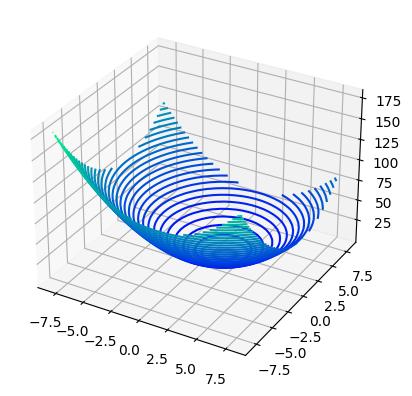

In [ ]:
# define a simple function f: R^2 -> R

def f(x,y):
    return ((x-1)**2+(y-2)**2)

# plot a graph of this function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

# prepare the 3D graph of the function
npoints = 30
limit = 8
x = np.linspace(-limit,limit,npoints)
y = np.linspace(-limit,limit,npoints)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

#fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.contour3D(X,Y,Z,40,cmap = 'winter')
plt.show()

 The code below illustrates how to compute gradient with tensorflow.

### Example
Compute the gradient of function `f` at point (2,3) using tensorflow. You can read more about automatic differentiation in Tensorflow [here](https://www.tensorflow.org/guide/autodiff?hl=en).

In [ ]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    z = f(x,y)
gz = tape.gradient(z,(x,y))

print(gz)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0>)


### Example
Let us implement from scratch a linear neuron, i.e. without activation function, that can learn using the tensorflow gradient computation.

First, we generate some artificial 2D data and visualise it.

Shape of neg_class and pos_class: (300, 2) (300, 2)
Shape of inputs and targets: (600, 2) (600, 1)


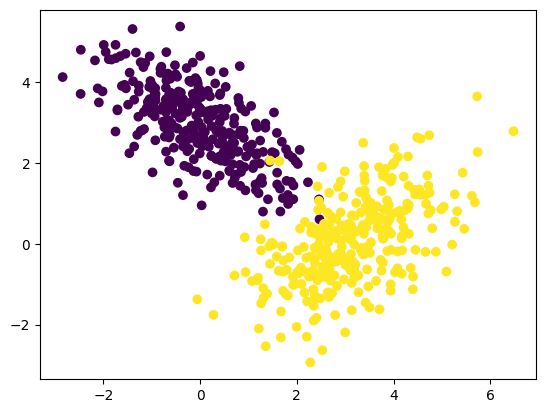

In [ ]:
# generate artificial data (two classes, each consisting of 300 points in 2D):
ncasesInClass = 300
neg_class = np.random.multivariate_normal(mean = [0,3],cov = [[1,-0.7],[-0.7,1]],size = ncasesInClass)
pos_class = np.random.multivariate_normal(mean = [3,0],cov = [[1,0.5],[0.5,1]],size = ncasesInClass)
print("Shape of neg_class and pos_class:", pos_class.shape, neg_class.shape)
inputs = np.vstack((neg_class, pos_class)).astype(np.float32)

# generate labels (300 '0', and 300 '1')
targets = np.vstack((np.zeros((ncasesInClass,1),dtype = "float32"), np.ones((ncasesInClass,1),dtype = "float32")))
print("Shape of inputs and targets:", inputs.shape,targets.shape)

# plot the data
plt.scatter(inputs[:,0],inputs[:,1],c = targets[:,0])
plt.show()

Next, we allocate the weight tensor (2D) and bias tensor (1D).

In [ ]:
input_dim = 2
output_dim = 1

# define the weigth matrix and bias

W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))
W, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.1153897],
        [0.2447536]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

Now, we define the basic functions of the neuron.

In [ ]:
def computeOutput(inputs):
    return tf.sigmoid(tf.matmul(inputs, W) + b)

def loss_function(desired, actual):
    return tf.compat.v1.losses.log_loss(desired, actual)

learning_rate = 0.1

def gradient_step(inputs, targets):
    with tf.GradientTape() as tape:
        loss = loss_function(targets, computeOutput(inputs))
    gr_loss_W, gr_loss_b = tape.gradient(loss, [W, b])
    W.assign_sub(gr_loss_W * learning_rate)  # Update variable by subtracting value from it.
    b.assign_sub(gr_loss_b * learning_rate)  # Update variable by subtracting value from it.
    return loss

# make the training loop
for i in range(30):
    print(gradient_step(inputs, targets))


tf.Tensor(0.117639594, shape=(), dtype=float32)
tf.Tensor(0.117632635, shape=(), dtype=float32)
tf.Tensor(0.11763229, shape=(), dtype=float32)
tf.Tensor(0.11763195, shape=(), dtype=float32)
tf.Tensor(0.117625006, shape=(), dtype=float32)
tf.Tensor(0.11762469, shape=(), dtype=float32)
tf.Tensor(0.11762435, shape=(), dtype=float32)
tf.Tensor(0.11761744, shape=(), dtype=float32)
tf.Tensor(0.11761712, shape=(), dtype=float32)
tf.Tensor(0.1176168, shape=(), dtype=float32)
tf.Tensor(0.117609926, shape=(), dtype=float32)
tf.Tensor(0.11760961, shape=(), dtype=float32)
tf.Tensor(0.11760931, shape=(), dtype=float32)
tf.Tensor(0.11760246, shape=(), dtype=float32)
tf.Tensor(0.11760215, shape=(), dtype=float32)
tf.Tensor(0.11760185, shape=(), dtype=float32)
tf.Tensor(0.11759504, shape=(), dtype=float32)
tf.Tensor(0.11759474, shape=(), dtype=float32)
tf.Tensor(0.11759443, shape=(), dtype=float32)
tf.Tensor(0.11758765, shape=(), dtype=float32)
tf.Tensor(0.11758737, shape=(), dtype=float32)
tf.Tensor(

Finally, we visualise the final decision hyperplane learnt by the neuron.

x.shape, y.shape, W.shape, b.shape: (100,) (100,) (2, 1) (1,)


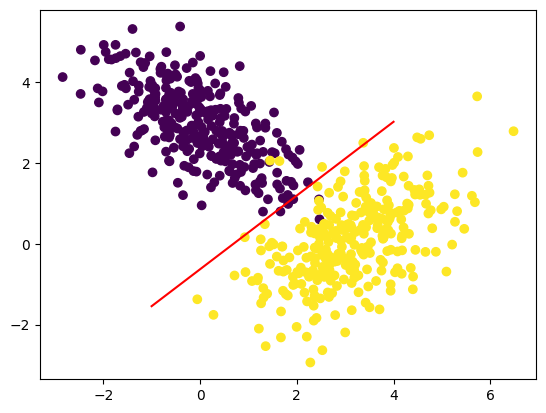

In [ ]:
predicted = computeOutput(inputs)

x = np.linspace(-1, 4, 100)
y = - (W[0] /  W[1]) * x + (0.5 - b) / W[1]
print("x.shape, y.shape, W.shape, b.shape:", x.shape, y.shape, W.shape, b.shape)
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])  # predictions[:, 0] > 0.5)
plt.show()

### Exercise 7
Following the *Building a simple MLP* section, create a 2-layer MLP (feed-forward NN) for classifying the MNIST data and evaluate it.

Details:

1. Import necessary modules.

1. Load MNIST data.

1. Reshape and scale data.

1. Split the training data into train (first 45000 cases) and validation (15000 cases). You can provide the validation data to the [Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) with the `validation_data` parameter of the `fit` method or use the `validation_split` parameter. Note that the test set has 15000 cases.

1. Create and train an NN having the following layers:
layer 1: (hidden layer) 512 neurons with the "relu" activation,   
layer 2: (output layer) 10 neurons with the "softmax: activation.

1. Compile it.

1. Train for 30 epochs with the batch_size=128.

1. Evaluate it on the test set.

Is the performance of the 2-layer model better than that of the 1-layer (that from Part 1)?

In [ ]:
# Put your code here


Epoch 1/100
352/352 [==============================] - 6s 15ms/step - loss: 0.3043 - accuracy: 0.9127 - val_loss: 0.1798 - val_accuracy: 0.9486
Epoch 2/100
352/352 [==============================] - 4s 11ms/step - loss: 0.1265 - accuracy: 0.9630 - val_loss: 0.1251 - val_accuracy: 0.9621
Epoch 3/100
352/352 [==============================] - 4s 11ms/step - loss: 0.0826 - accuracy: 0.9762 - val_loss: 0.1027 - val_accuracy: 0.9697
Epoch 4/100
352/352 [==============================] - 5s 14ms/step - loss: 0.0596 - accuracy: 0.9824 - val_loss: 0.1030 - val_accuracy: 0.9683
Epoch 5/100
352/352 [==============================] - 4s 11ms/step - loss: 0.0447 - accuracy: 0.9873 - val_loss: 0.0945 - val_accuracy: 0.9723
Epoch 6/100
352/352 [==============================] - 4s 10ms/step - loss: 0.0331 - accuracy: 0.9906 - val_loss: 0.0805 - val_accuracy: 0.9757
Epoch 7/100
352/352 [==============================] - 5s 13ms/step - loss: 0.0256 - accuracy: 0.9928 - val_loss: 0.0828 - val_accuracy:

[0.08460544049739838, 0.982699990272522]

## Monitoring the training of MLP
To illustrate the basic methodology of monitoring the training process we take another dataset and train a MLP classifier.

Let's create some new artificial 2D dataset and visualise it:

(800, 2) (200, 2) (800,) (200,)


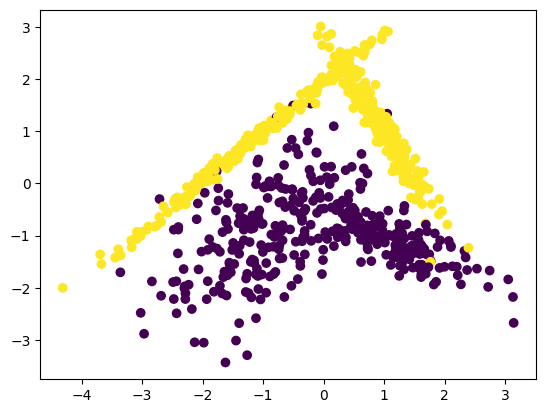

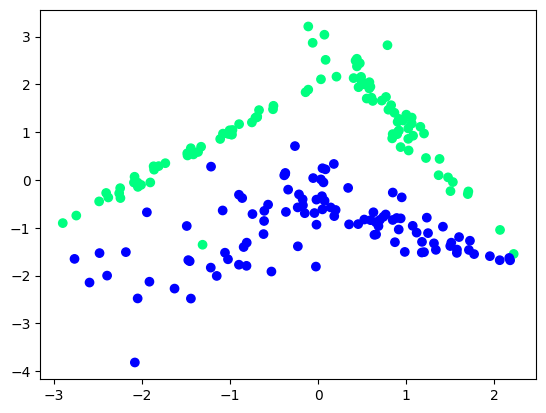

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

n = 1000
inputs, labels = make_classification(
    n_samples=n, n_features = 2, n_informative = 2, n_redundant = 0,
    random_state=3, shuffle = True, n_clusters_per_class=2
)

# train/test split
fraction = 0.8
limit = int(fraction*n)
xtrain = inputs[:limit,:]
ytrain = labels[:limit]
xtest = inputs[limit:,:]
ytest = labels[limit:]
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

plt.scatter(xtrain[:,0],xtrain[:,1],c = ytrain)
plt.show()
plt.scatter(xtest[:,0],xtest[:,1],c = ytest, cmap = 'winter')
plt.show()

### Exercise 8
Split the training set into partial training (80%) and validation set (20%)

In [ ]:
# create validation set
trfr = 0.8 # train fraction
ntr = int(trfr*xtrain.shape[0])
xptrain = xtrain[:ntr] # x partial train
yptrain = ytrain[:ntr]
xval = xtrain[ntr:]
yval = ytrain[ntr:]
xptrain.shape, yptrain.shape, xval.shape, yval.shape

((640, 2), (640,), (160, 2), (160,))

### Training history
`fit` method in keras returns a "history" object that can be used to monitor the training process.
### Exercise 9
Create 3-layer MLP with 10 neurons, 5 neurons, respectively in 2 hidden layers and "relu" activation and 1 neuron with sigmoid activation (typical for 2-class classifier) in the output layer and compile it.

Fit the model for 30 epochs but this time keep the history object returned by the `fit` method. Print the summary of the model (model's method `summary`), to see the number of parameters of this network.

How many parameters does it have? Can you explain this number?

In [ ]:
# Put your code here


Epoch 1/70
80/80 [==============================] - 1s 7ms/step - loss: 0.4702 - accuracy: 0.8453 - val_loss: 0.3497 - val_accuracy: 0.8875
Epoch 2/70
80/80 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.8969 - val_loss: 0.2339 - val_accuracy: 0.9000
Epoch 3/70
80/80 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9187 - val_loss: 0.2010 - val_accuracy: 0.9187
Epoch 4/70
80/80 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9297 - val_loss: 0.1700 - val_accuracy: 0.9312
Epoch 5/70
80/80 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9375 - val_loss: 0.1513 - val_accuracy: 0.9500
Epoch 6/70
80/80 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9484 - val_loss: 0.1386 - val_accuracy: 0.9500
Epoch 7/70
80/80 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9516 - val_loss: 0.1271 - val_accuracy: 0.9563
Epoch 8/70
80/80 [==

### Visualising the training history
We can plot the loss value from training with use of the history dictionary.

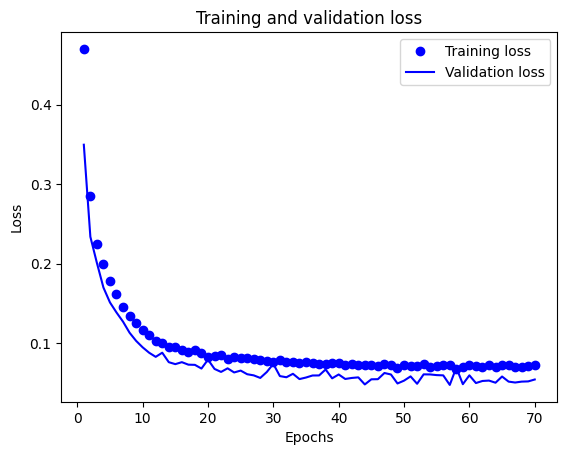

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Notice that the loss value monotonically decreases both on the training and validation set.
In some cases the validation loss from some epoch starts increasing again while the training loss still decreases. Such a phenomenon is a typical signal of overfitting and can be used to tune the right number of training epochs

### Exercise 10
Plot analogous graph to the above, but visualisng accuracy as the function of epoch.
Is the accuracy monotically growing? What number of epochs (approximately) suffices for training in this setting, i.e., when does the training progress practically stop and further epochs do not improve the model?

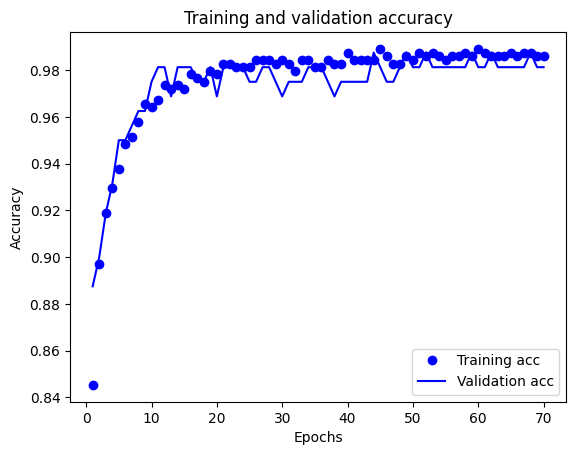

In [ ]:
# Put your code here


### Exercise 11
Evaluate the trained model on the test set.

In [ ]:
# Put your code here


7/7 [==============================] - 0s 6ms/step - loss: 0.1333 - accuracy: 0.9850
[0.1332850605249405, 0.9850000143051147]


## Example of a more sophisticated NN architecture: CNN as image classifier
In this part we load more demanding dataset called "fashion_mnist" that contains 10000 28x28 monochromatic pictures of some pieces of clothing each belonging to one of 10 classes like "t-shirt", "pullover", etc. (see: https://keras.io/api/datasets/fashion_mnist/).

While the format of this dataset is identical to that of MNIST, the task is obviously much harder for a classifier.

We first check the performance of a small 3-layer MLP on this dataset.

Then, we compare it with a specialised Convolutional NN (CNN) architecture, that is especially designed for images. We do not discuss CNN in detail in this course since it is a larger topic, but just demonstrate its ability to work with images.



### Exercise 12
Load the `fasion_mnist` dataset, split it into train and test sets (with the `load_data` function as before), print the tensor shapes, rescale data (divide by 255) and flatten as with the MNIST dataset.

In [ ]:
# Put your code here


4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Exercise 13
Build, compile and train (for 10 epochs) a 3-layer MLP for the fashion-MNIST dataset with 512 and 64 neurons in the hidden layers and with "relu" activation. How many neurons and what activation function should be used in the third, output layer?

Keep the training history returned by the `fit` method.

Print the model's summary to see the total number of parameters of this NN.

In [ ]:
# Put your code here


Epoch 1/10
704/704 [==============================] - 10s 13ms/step - loss: 0.5515 - accuracy: 0.7975 - val_loss: 0.6513 - val_accuracy: 0.7673
Epoch 2/10
704/704 [==============================] - 10s 14ms/step - loss: 0.3868 - accuracy: 0.8586 - val_loss: 0.3816 - val_accuracy: 0.8616
Epoch 3/10
704/704 [==============================] - 10s 14ms/step - loss: 0.3468 - accuracy: 0.8731 - val_loss: 0.4508 - val_accuracy: 0.8467
Epoch 4/10
704/704 [==============================] - 8s 12ms/step - loss: 0.3238 - accuracy: 0.8807 - val_loss: 0.3432 - val_accuracy: 0.8797
Epoch 5/10
704/704 [==============================] - 7s 10ms/step - loss: 0.3069 - accuracy: 0.8866 - val_loss: 0.4041 - val_accuracy: 0.8567
Epoch 6/10
704/704 [==============================] - 10s 14ms/step - loss: 0.2944 - accuracy: 0.8912 - val_loss: 0.3932 - val_accuracy: 0.8595
Epoch 7/10
704/704 [==============================] - 6s 8ms/step - loss: 0.2824 - accuracy: 0.8968 - val_loss: 0.4247 - val_accuracy: 0.8

### Example
We can use Pandas DataFrame to visualise training history (loss and accuracy) on a single plot.

<Axes: >

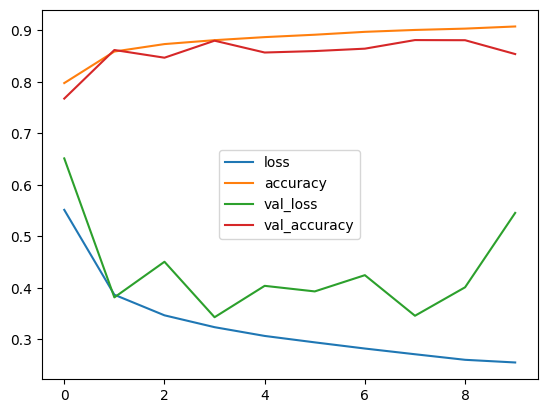

In [ ]:
pd.DataFrame(history.history).plot()


### Exercise 14
Evaluate the model on the test set.

In [ ]:
# Put your code here


313/313 [==============================] - 1s 3ms/step - loss: 0.5850 - accuracy: 0.8439


[0.5850266814231873, 0.8439000248908997]

### Using a CNN architecture for the image classification task

### Example
Below we create a CNN network consisting of 3 convolutional layers and 2 pooling layers and a single dense layer on the top of it.

At the same time, in this example we also demonstrate another way of creating NN in Keras by so-called "functional" interface. It is more flexible since it is possible to create a NN of arbitrary directed acyclic graph topology with it. This particular CNN could have been defined also using the "Sequential" method.

Compare the total number of parameters of this networks with the previous small MLP! CNN's are especially designed to have lower number of parameters than standard "dense" MLPs.

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
modelconv = keras.Model(inputs=inputs, outputs=outputs)

modelconv.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

### Exercise 15
Train the CNN network for 10 epochs. Keep the training history. Notice much slower training of this model compared to classic "dense" MLP (despite its lower number of parameters)

In [ ]:
# Put your code here

Epoch 1/10
750/750 [==============================] - 50s 66ms/step - loss: 0.5542 - accuracy: 0.7962 - val_loss: 0.4304 - val_accuracy: 0.8453
Epoch 2/10
750/750 [==============================] - 45s 60ms/step - loss: 0.3434 - accuracy: 0.8751 - val_loss: 0.3247 - val_accuracy: 0.8840
Epoch 3/10
750/750 [==============================] - 47s 62ms/step - loss: 0.2897 - accuracy: 0.8956 - val_loss: 0.2994 - val_accuracy: 0.8927
Epoch 4/10
750/750 [==============================] - 44s 58ms/step - loss: 0.2601 - accuracy: 0.9045 - val_loss: 0.2809 - val_accuracy: 0.8976
Epoch 5/10
750/750 [==============================] - 44s 58ms/step - loss: 0.2348 - accuracy: 0.9140 - val_loss: 0.2638 - val_accuracy: 0.9065
Epoch 6/10
750/750 [==============================] - 46s 62ms/step - loss: 0.2138 - accuracy: 0.9223 - val_loss: 0.2550 - val_accuracy: 0.9068
Epoch 7/10
750/750 [==============================] - 46s 62ms/step - loss: 0.1971 - accuracy: 0.9289 - val_loss: 0.2659 - val_accuracy:

### Exercise 16
Plot the history for previous exercise (traing/validation x loss/accuracy as the function of epoch). Can you see any symptoms of overfitting? In which epoch?

Evaluate the model on the test set.

Is the performance of CNN superior to that of standard dense MLP on this set (despite its much lower number of parameters)?

313/313 [==============================] - 3s 9ms/step - loss: 0.3066 - accuracy: 0.8966


[0.30656132102012634, 0.8966000080108643]

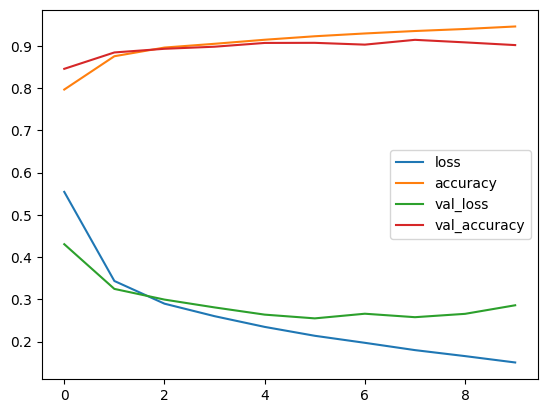

In [ ]:
# Put your code here


## Further materials
* Free Tensorflow [tutorial](https://www.youtube.com/watch?v=IA3WxTTPXqQ). It starts very slow but lots of details are explained
* Tensorflow [Playground](https://playground.tensorflow.org/)
* [Tensorboard](https://www.tensorflow.org/tensorboard/get_started?hl=pl) (can be used both in Tensorflow and [Pytorch](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html))
* Big Pytorch [tutorial](https://www.youtube.com/watch?v=Z_ikDlimN6A)
* Shorter Pytorch [tutorial](https://www.youtube.com/watch?v=c36lUUr864M) (recommended)
* [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
* [Image kernels explained visually](https://setosa.io/ev/image-kernels/)

<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>